# Libraries


## Import 

In [65]:
#python libraries
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Data Manipulation and Analysis Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#using the scientific library
# Dendrogram for visualizing the hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
#feature selection
from sklearn.feature_selection import mutual_info_regression
#Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score , silhouette_score



#Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

# Data Acquisition 

### This is the stage where you bring in data in your desired format. In this project , it is a csv format

In [2]:
#bringing in my data and storing it in a variable named car_data
car_data = pd.read_csv('car_sales_data.csv')
#checking the first 10 rows of my dataframe
car_data.head(10)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
5,Ford,Focus,1.4,Petrol,2018,33603,29204
6,Ford,Mondeo,1.8,Diesel,2010,86686,14350
7,Toyota,Prius,1.4,Hybrid,2015,30663,30297
8,VW,Polo,1.2,Petrol,2012,73470,9977
9,Ford,Focus,2.0,Diesel,1992,262514,1049


### Exploring more on my data 

In [3]:
#checking my data structure in terms of the shape
car_data.shape

(50000, 7)

In [4]:
#checking the columns in the data 
car_data.columns

Index(['Manufacturer', 'Model', 'Engine size', 'Fuel type',
       'Year of manufacture', 'Mileage', 'Price'],
      dtype='object')

In [5]:
#checking the data types of all the columns in my dataset
car_data.dtypes

Manufacturer            object
Model                   object
Engine size            float64
Fuel type               object
Year of manufacture      int64
Mileage                  int64
Price                    int64
dtype: object

In [6]:
# checking more statistical information on the data 
car_data.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [7]:
# checking more information on the data 
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


### Checking if we generally have null values

In [8]:
#checking if we have a null values in the data
car_data.isnull().sum() # The output shows we have no null values 

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

### Checking for the Unique fields in each columns

In [9]:
#Digging Dip into each feature in the dataset
def CheckUnique(sub_data):
    data = car_data[sub_data].unique() # check for uniqueness in the columns 
   

    return data

In [10]:
#checking the uniqueness for Manufacturer Field
CheckUnique('Manufacturer')

array(['Ford', 'Porsche', 'Toyota', 'VW', 'BMW'], dtype=object)

In [11]:
#checking the uniqueness for Model Field
CheckUnique('Model')

array(['Fiesta', '718 Cayman', 'Mondeo', 'RAV4', 'Polo', 'Focus', 'Prius',
       'Golf', 'Z4', 'Yaris', '911', 'Passat', 'M5', 'Cayenne', 'X3'],
      dtype=object)

In [12]:
#checking the uniqueness for Engine Size Field
CheckUnique('Engine size')

array([1. , 4. , 1.6, 1.8, 1.4, 1.2, 2. , 2.2, 2.4, 2.6, 3.5, 4.4, 3. ,
       5. ])

In [13]:
#checking the uniqueness for Fuel Type Field
CheckUnique('Fuel type')

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [14]:
#checking the uniqueness for Year of manufacture Field
CheckUnique('Year of manufacture')

array([2002, 2016, 2014, 1988, 2006, 2018, 2010, 2015, 2012, 1992, 1990,
       2007, 1998, 1989, 2003, 1987, 1996, 2009, 2017, 2005, 2020, 2001,
       2008, 1995, 2000, 1994, 2004, 1997, 1993, 1991, 1999, 1985, 2021,
       2013, 1986, 1984, 2019, 2011, 2022])

In [15]:
#checking the uniqueness for Year of Mileage Field
CheckUnique('Mileage')

array([127300,  57850,  39190, ...,   4030,  26468, 109300])

In [16]:
#checking the uniqueness for Price Field
CheckUnique('Price')

array([  3074,  49704,  24072, ..., 113006,  49852,  23630])

In [17]:
# Checking the distribution of all numerical columns
def checkDistribution(data):
    chart = sns.histplot(car_data[data] , kde=True);
    plt.title(f'Distribution chart of {data}');
    plt.show();
    
    return chart;
    

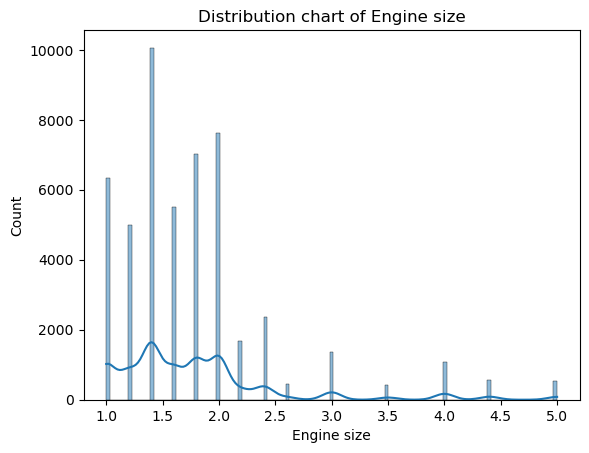

In [18]:
# checking the specified Engine size distribution
checkDistribution('Engine size');

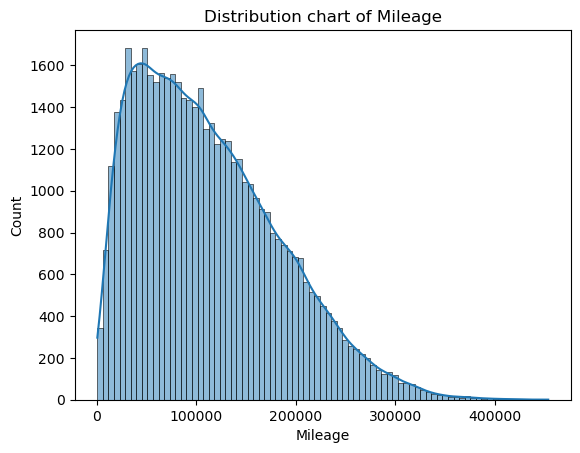

In [19]:
# checking the specified Mileage distribution
checkDistribution('Mileage');

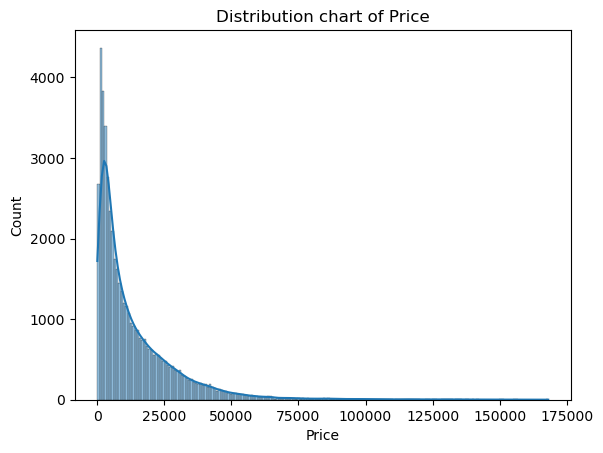

In [20]:
# checking the specified Mileage distribution
checkDistribution('Price');

# Exploratory Data Analysis

In [21]:
# exploring through charts in all columns 
def numericCharts(data1,data2):
    chart = sns.scatterplot(x = data1 , y = data2, data = car_data);
    plt.title(f'Scatter Plot of {data1} and {data2}');
    plt.xlabel(f'{data1}');
    plt.ylabel(f'{data2}');
    plt.show();
    
    
    return chart

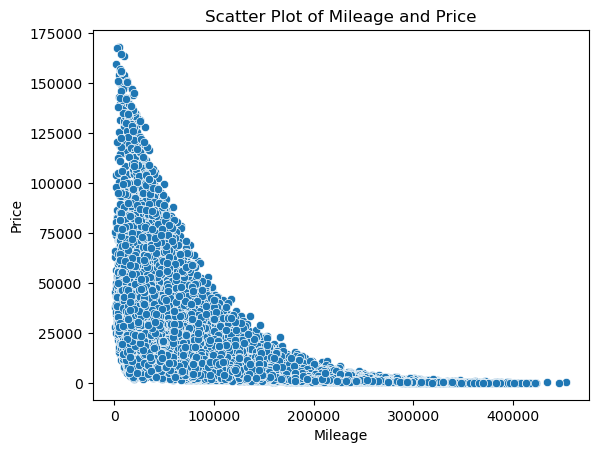

In [22]:
# create a visualization(scatterplot) of two continuous variables
numericCharts('Mileage', 'Price');

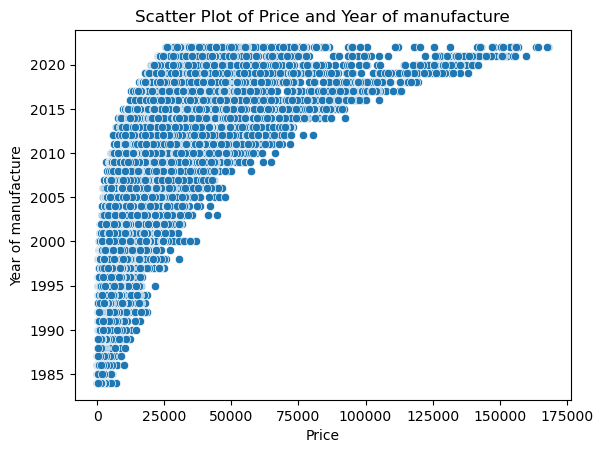

In [23]:
# create a visualization(scatterplot) of two continuous variables
numericCharts('Price', 'Year of manufacture');

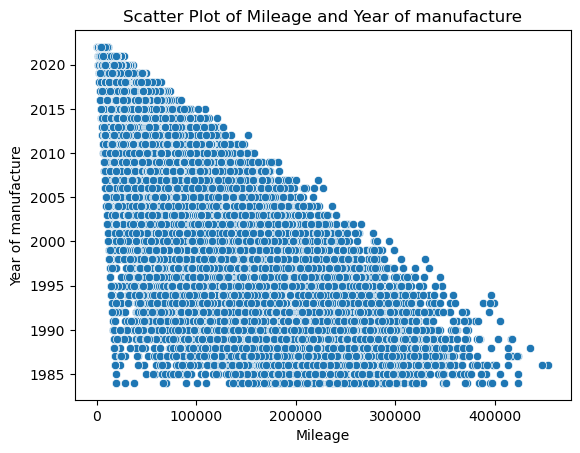

In [24]:
# create a visualization(scatterplot) of two continuous variables
numericCharts('Mileage', 'Year of manufacture');

In [25]:
# exploring through charts in all columns 
def categoricalCharts(data1,  data2 ,data3):
    chart = sns.catplot(x = data1 , y = data2, data = car_data, hue = data3 , height = 9, kind="bar");
    plt.title(f'Barchart of {data1} and {data2}');
    plt.xlabel(f'{data1}');
    plt.ylabel(f'{data2}');
    
    
    
    return chart

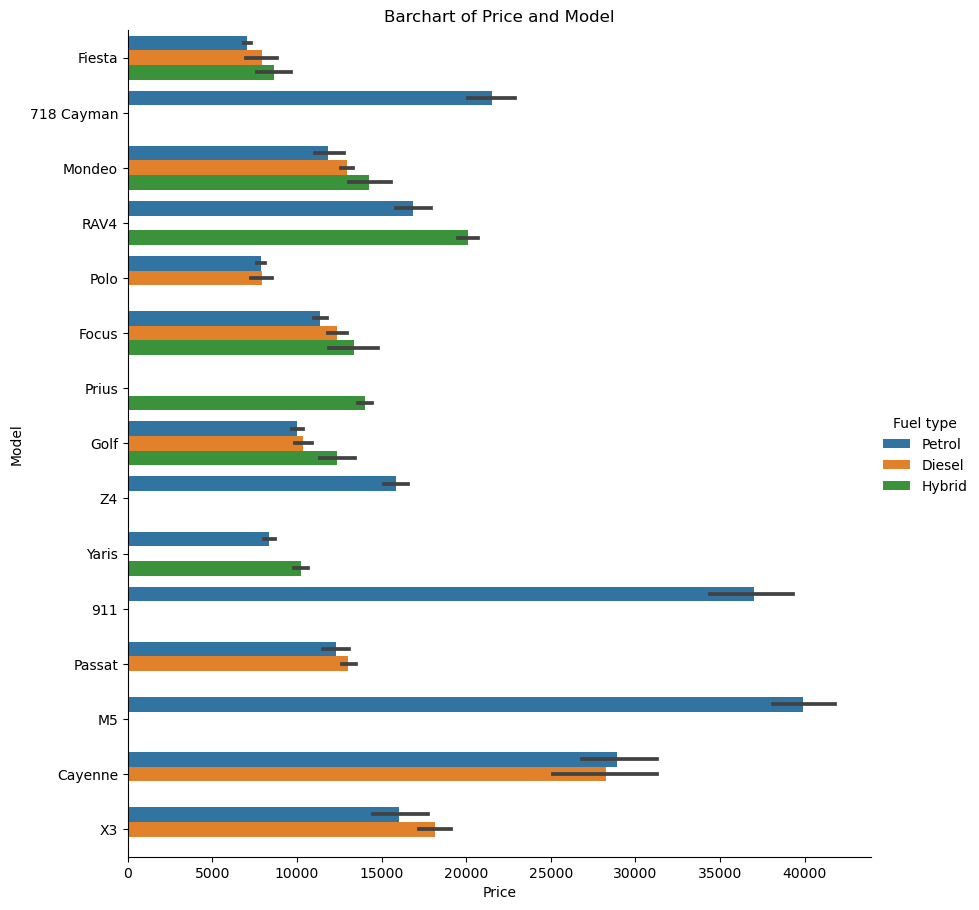

In [26]:
categoricalCharts('Price' , 'Model' ,'Fuel type')

# MODELLING

### Regression model is used for supervised learning. Because you have continuous variable


## Exercise 1A

### Checking the car price best predictiors.

In [27]:
#extract out the predictors 
features = [  'Engine size' , 'Mileage', 'Year of manufacture']
X = car_data[features]

In [28]:
#extracting the variable for the target
y = car_data["Price"]

In [29]:
# splitting the data into train and test
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size = 0.20)

# Feature Selection 

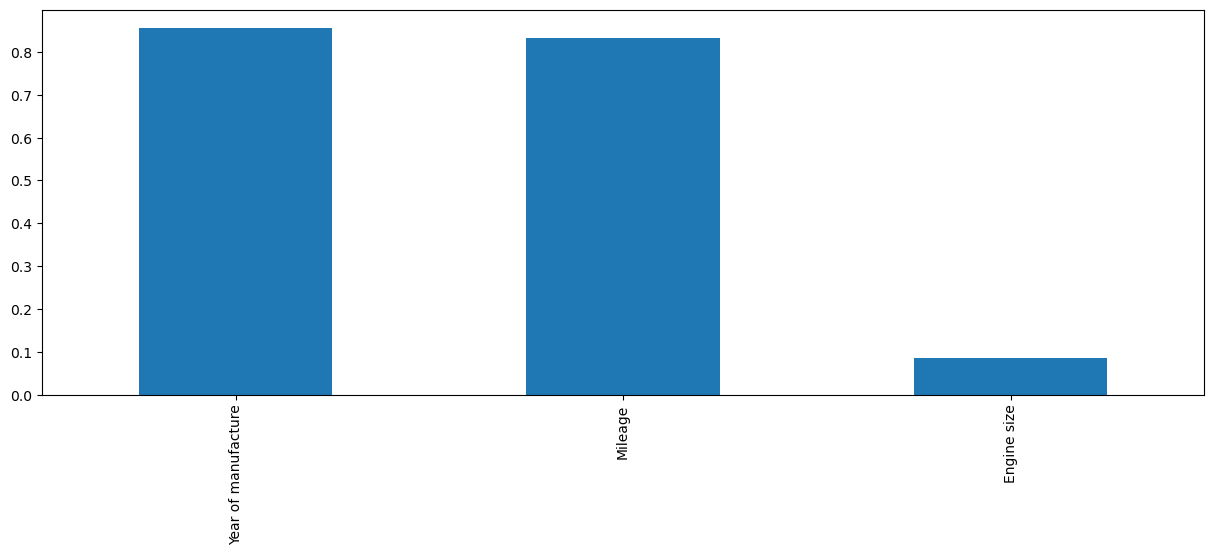

In [30]:
# writing a function check for the best feature
def featureSelection():
    # feature selection engineering 
    mutual_info = mutual_info_regression(x_train , y_train)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = x_train.columns
    mutual_info.sort_values(ascending=False)
    mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
    

featureSelection()    

# Predicting The Price Using A Single Feature

In [31]:
def predictPrice(data_x , data_y):
    
    # declare the variables for predictors and target  
    X = car_data[data_x]
    y = car_data[data_y]
    
    # Reshape X to have two dimensions
    X = X.values.reshape(-1, 1)
    
    #divide my data into train test split
    x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.20)
    
     # initialize the regression model
    lm = LinearRegression()

    # fit the regression model
    lm.fit(x_train , y_train)
    
    # predict your values
    y_pred = lm.predict(x_test)
    
     # create a DataFrame for plotting
    plot_data = pd.DataFrame({data_x: x_test.flatten(), data_y: y_test, 'Predicted': y_pred})
    
     # plotting using seaborn
    sns.lmplot(x=data_x, y=data_y, data=plot_data, aspect=2, height=6)
    plt.title('Linear Regression Model')
    plt.show()

    #printing the evaluation metrics
    print(f"The evaluation metrics using the Rscore is {r2_score(y_test , y_pred):.2f}")
    
   

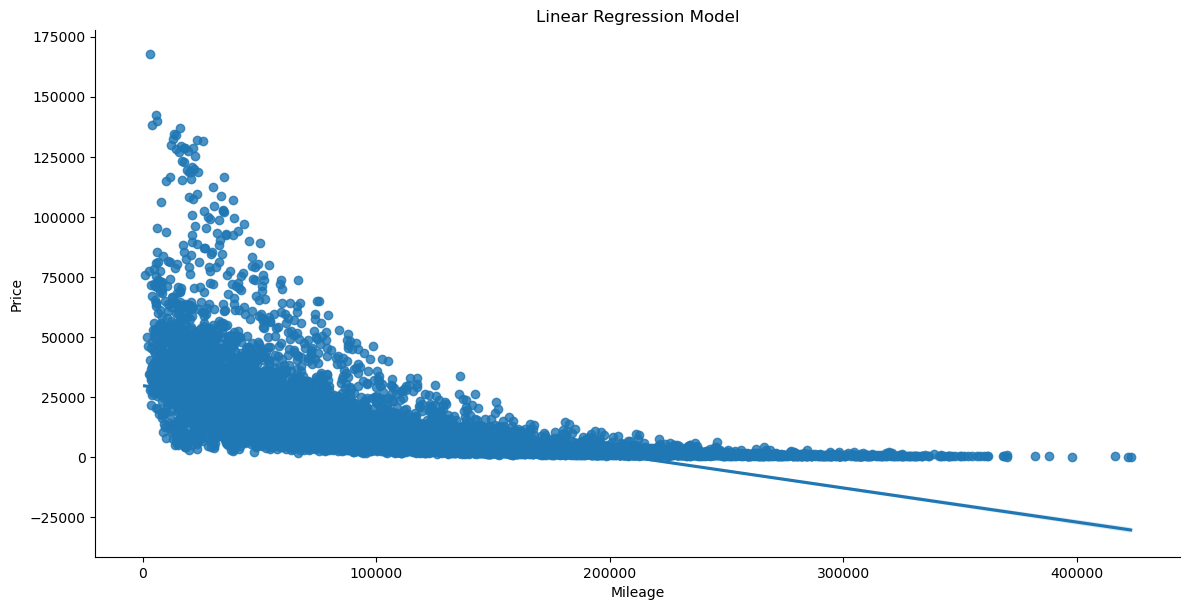

The evaluation metrics using the Rscore is 0.40


In [32]:
predictPrice('Mileage' , 'Price')

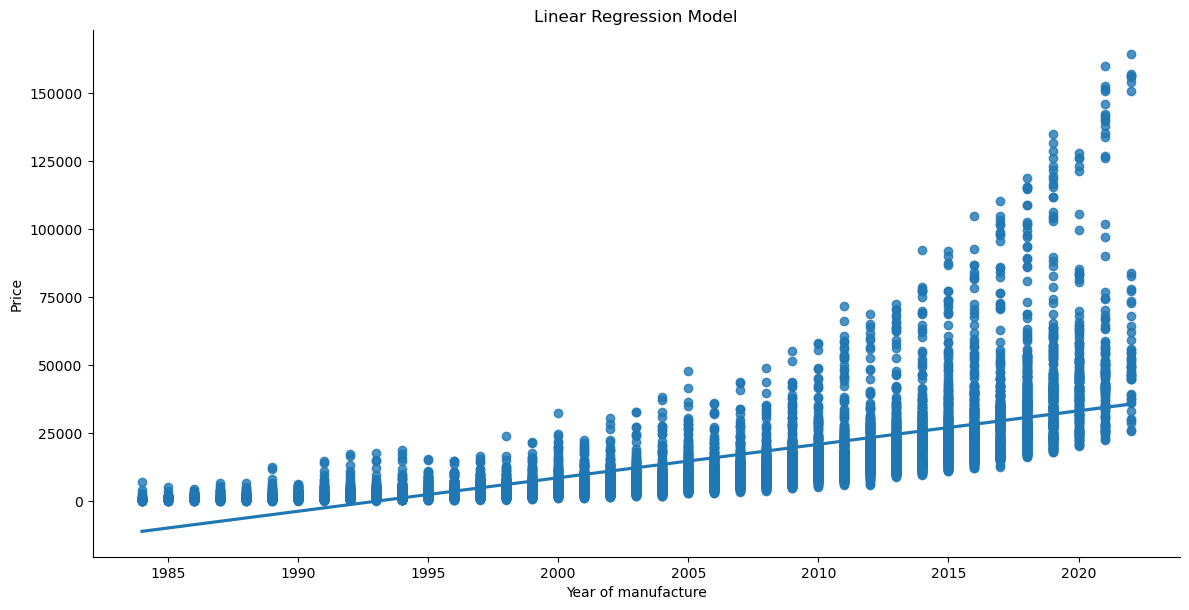

The evaluation metrics using the Rscore is 0.49


In [33]:
predictPrice('Year of manufacture' , 'Price')

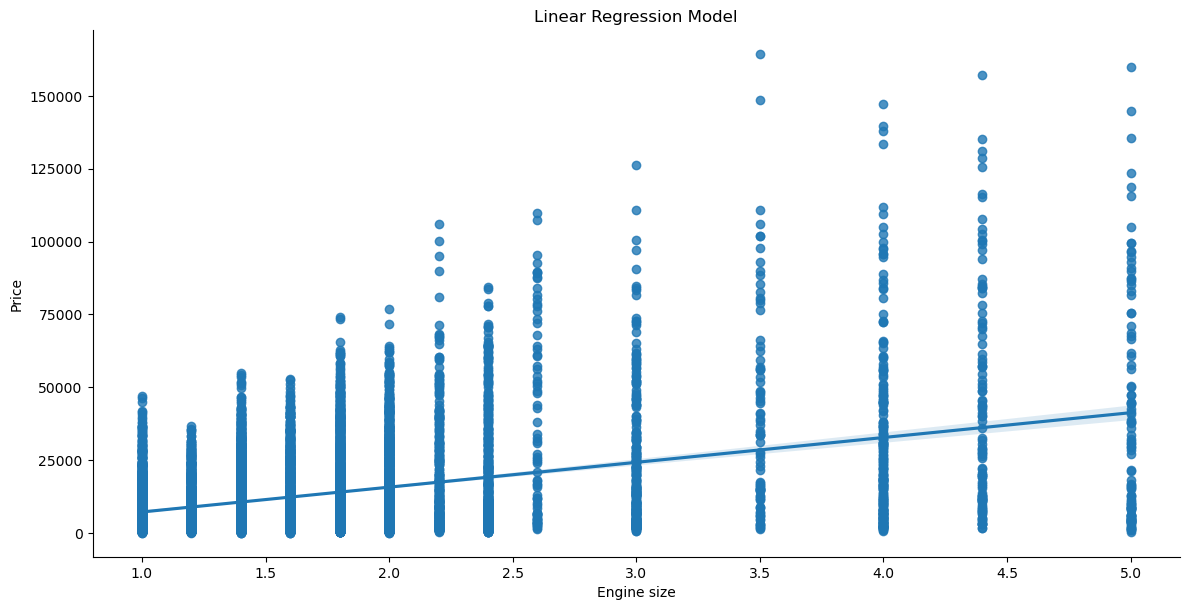

The evaluation metrics using the Rscore is 0.15


In [34]:
predictPrice('Engine size' , 'Price')

# Using the Polynomial features to write a function

In [35]:
def predictPricePoly(data_x, data_y, degree=2, test_size=0.2, random_state=None):
    
    # declare the variables for predictors and target  
    X = car_data[data_x]
    y = car_data[data_y]
    
    # Reshape X to have two dimensions
    X = X.values.reshape(-1, 1)

    # Converting features into polynomial features
    polynomial_f = PolynomialFeatures(degree=degree)
    X_poly = polynomial_f.fit_transform(X)
    
    #spliting the data from train to test split
    x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=random_state)
    
    #initializing the linear models
    lm = LinearRegression()
    #fitting the models
    lm.fit(x_train, y_train)
    #predicting the model
    y_pred = lm.predict(x_test)

    # For plotting, create a DataFrame with original and predicted values
    plot_data = pd.DataFrame({data_x: X.flatten(), data_y: y, 'Predicted': lm.predict(X_poly)})
    plot_data = plot_data.sort_values(by=data_x)  # Sort for better visualization
    
    #plotting using the seaborn library
    fig,ax = plt.subplots(figsize = (15,6))
    sns.scatterplot(x=data_x, y=data_y, data=plot_data , ax=ax)
    plt.plot(plot_data[data_x], plot_data['Predicted'], color='red', label='Predicted')
    plt.xlabel(data_x)
    plt.ylabel(data_y)
    plt.title(f'Polynomial Regression (Degree={degree})')
    plt.legend()
    plt.show()

    print(f"The evaluation metrics using the R² score is {r2_score(y_test, y_pred):.2f}")

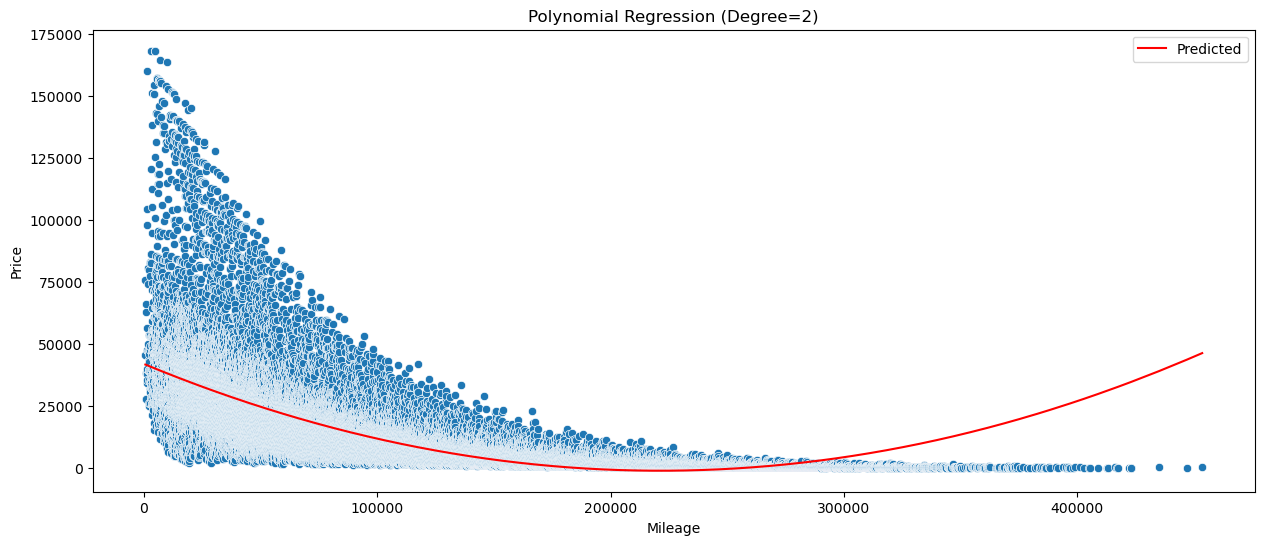

The evaluation metrics using the R² score is 0.52


In [36]:
predictPricePoly('Mileage' , 'Price', degree = 2)

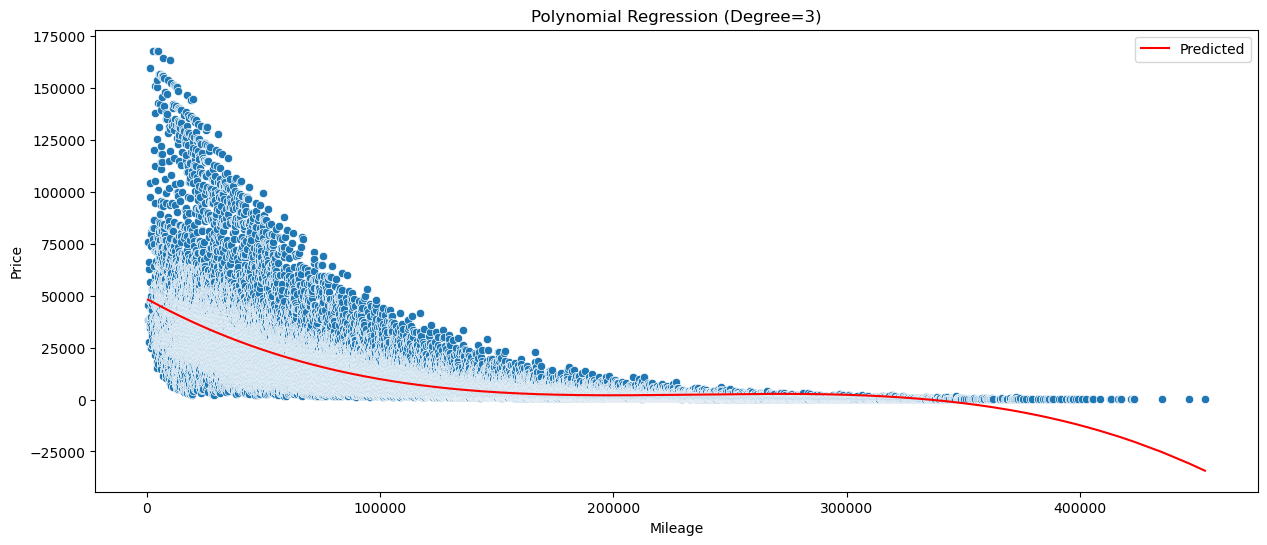

The evaluation metrics using the R² score is 0.54


In [37]:
predictPricePoly('Mileage' , 'Price', degree = 3)

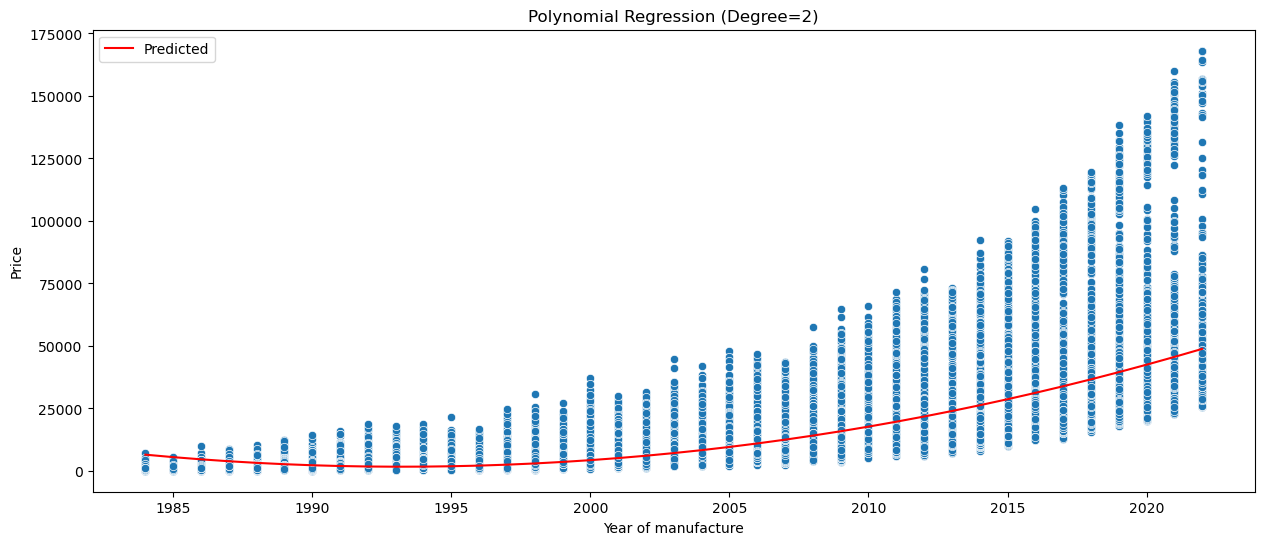

The evaluation metrics using the R² score is 0.60


In [38]:
predictPricePoly('Year of manufacture' , 'Price', degree = 2)

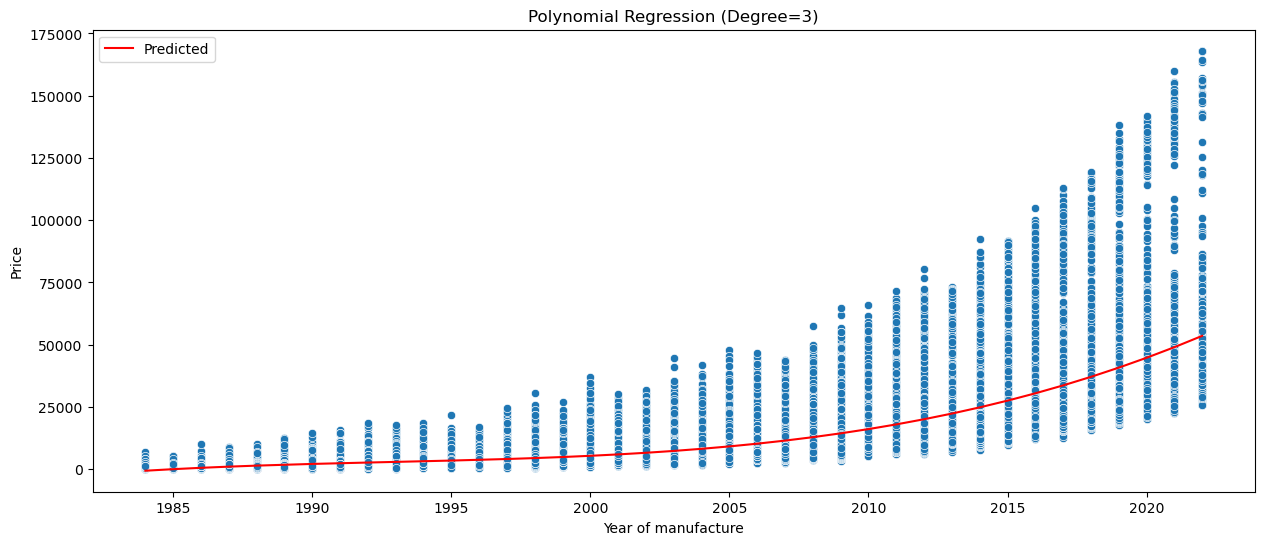

The evaluation metrics using the R² score is 0.62


In [39]:
predictPricePoly('Year of manufacture' , 'Price', degree = 3)

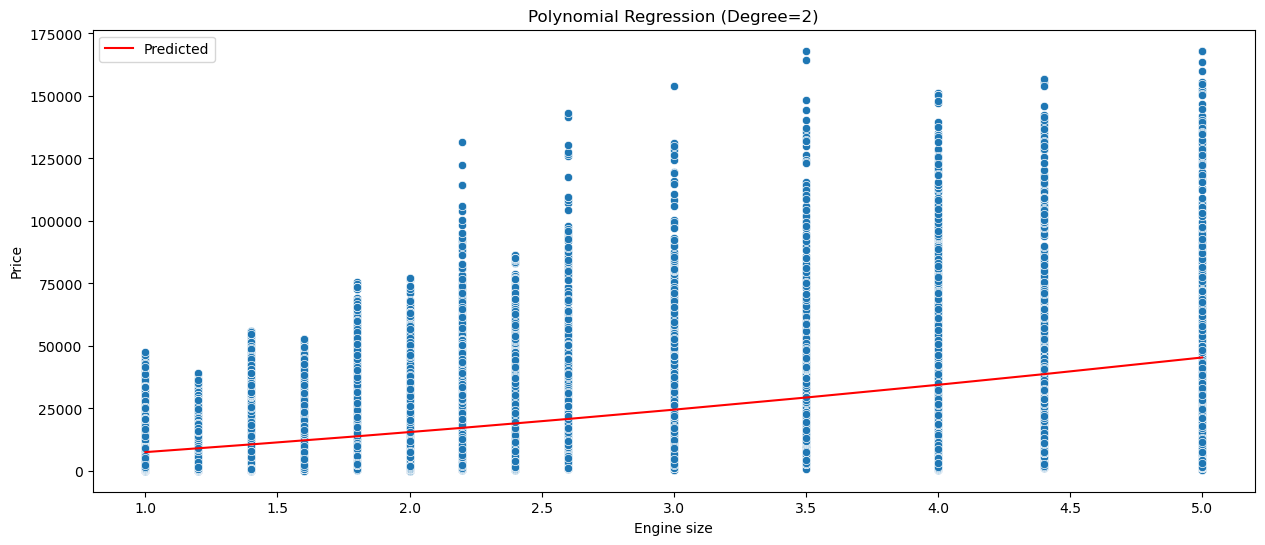

The evaluation metrics using the R² score is 0.14


In [40]:
predictPricePoly('Engine size' , 'Price', degree = 2)

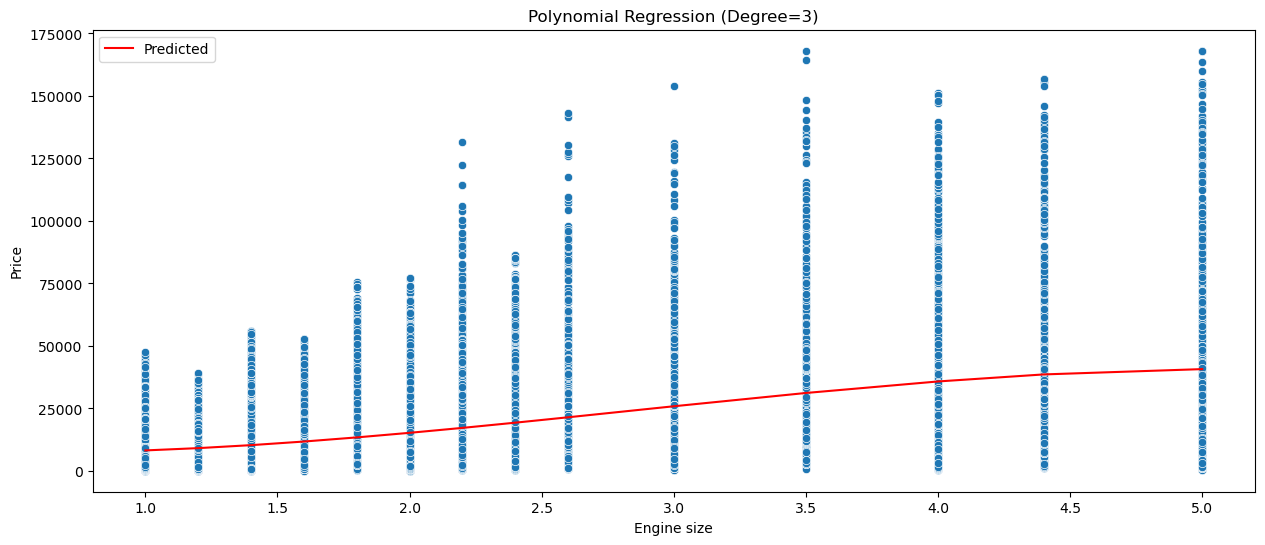

The evaluation metrics using the R² score is 0.16


In [41]:
predictPricePoly('Engine size' , 'Price', degree = 3)

### Based on the charts it is so evident that the models will perform better on the polynomial regression except the engine size due to its least correlation with the price.

# Exercise 1B

### Using a Multiple Feature for a better Accuracy or not

In [42]:
def predictPricePolyMult(data_x, data_y, degree=2, test_size=0.2, random_state=None):
    
    # declare the variables for predictors and target  
    X = car_data[data_x]
    y = car_data[data_y]

    # In case we are using a multiple features, reshape X to be a 2D
    if isinstance(data_x, list):
        X = X[data_x].values

    # Converting features into polynomial features
    polynomial_f = PolynomialFeatures(degree=degree)
    X_poly = polynomial_f.fit_transform(X)
    
    #spliting the data from train to test split
    x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=random_state)
    
    #initializing the linear models
    lm = LinearRegression()
    #fitting the models
    lm.fit(x_train, y_train)
    #predicting the model
    y_pred = lm.predict(x_test)

    # For plotting, create a DataFrame with original and predicted values
    plot_data = pd.DataFrame({data_y: y, 'Predicted': lm.predict(X_poly)})
    plot_data = plot_data.sort_values(by=data_y)  # Sort for better visualization
    
    #Labelling
    plt.figure(figsize=(15, 6))
    plt.scatter(y, plot_data['Predicted'])
    plt.plot(plot_data[data_y], plot_data['Predicted'], color='red', label='Predicted Line')
    plt.xlabel(f'Actual {data_y}')
    plt.ylabel(f'Predicted {data_y}')
    plt.title(f'Polynomial Regression (Degree={degree})')
    plt.show()

    print(f"The evaluation metrics using the R² score is {r2_score(y_test, y_pred):.2f}")

#### Prediction for a Linear Model

### Visualizing the data for a 2 features and a Linear Regression model

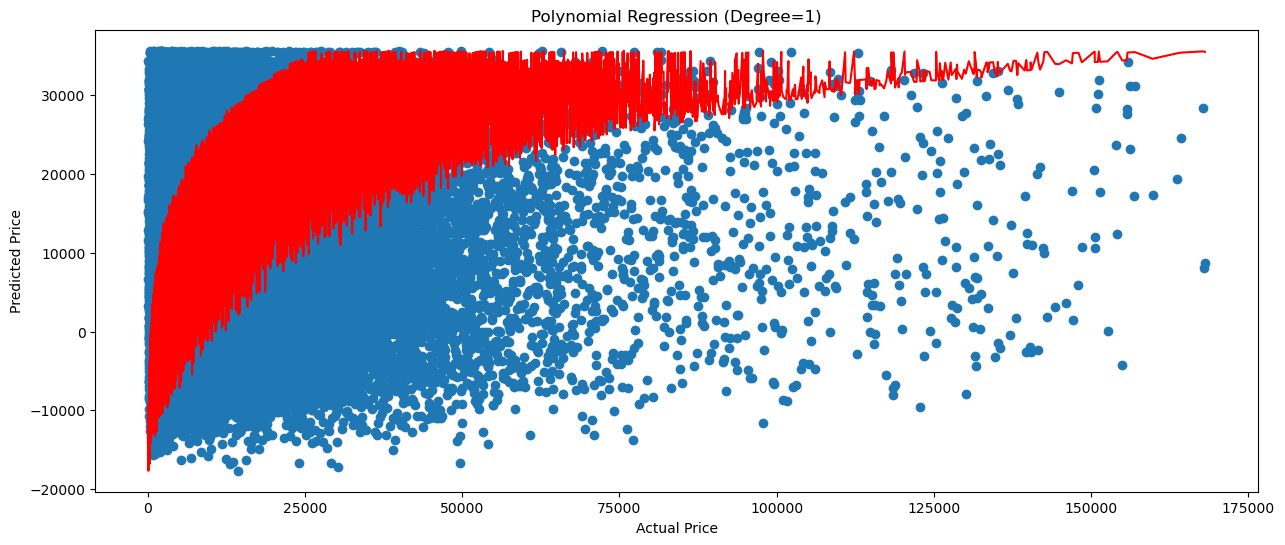

The evaluation metrics using the R² score is 0.52


In [43]:
predictPricePolyMult(['Year of manufacture' , 'Mileage'] , 'Price' , degree = 1)

### Visualizing the data for a 3 features and a Linear Regression model

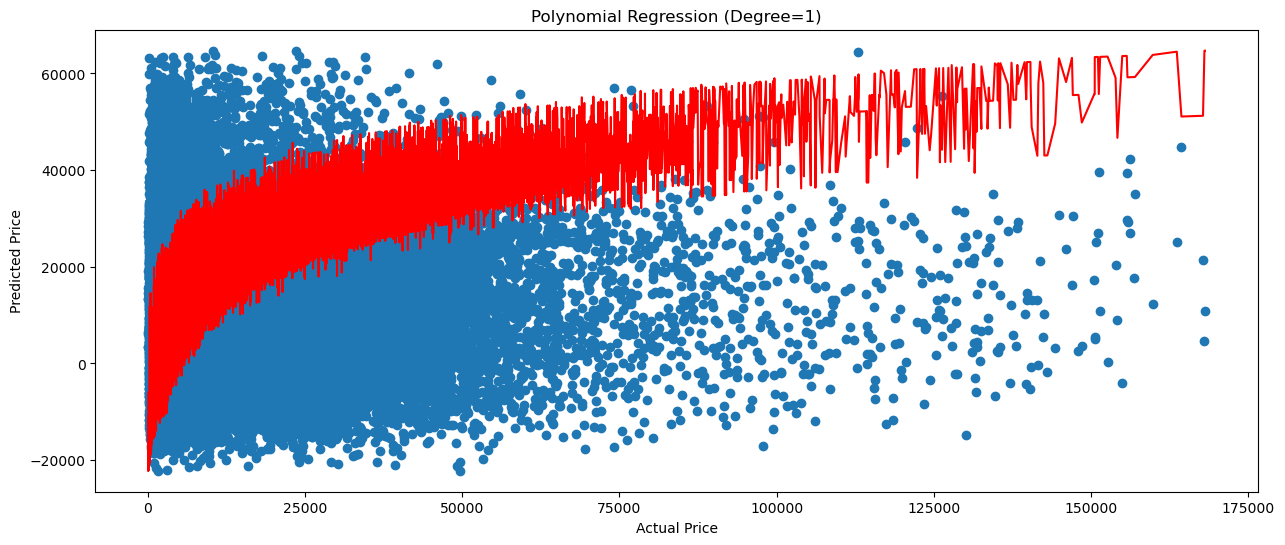

The evaluation metrics using the R² score is 0.69


In [44]:
predictPricePolyMult(['Year of manufacture' , 'Mileage' , 'Engine size'] , 'Price' , degree = 1)

### Visualizing the data for a 2 features and a Polynomial Regression model

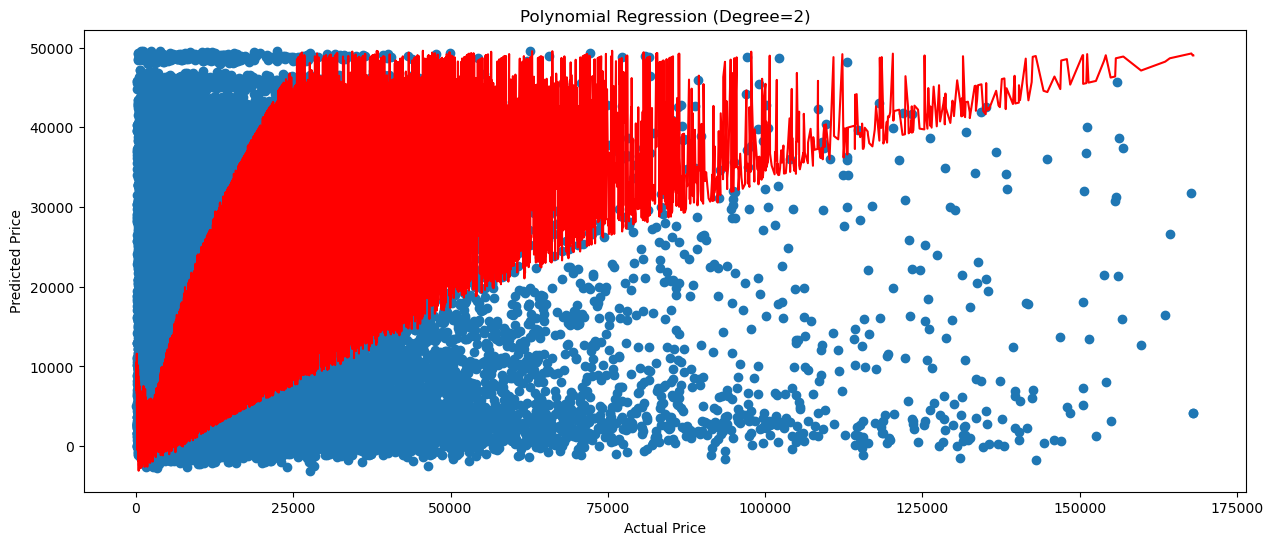

The evaluation metrics using the R² score is 0.63


In [45]:
predictPricePolyMult(['Year of manufacture' , 'Mileage'] , 'Price' , degree = 2)

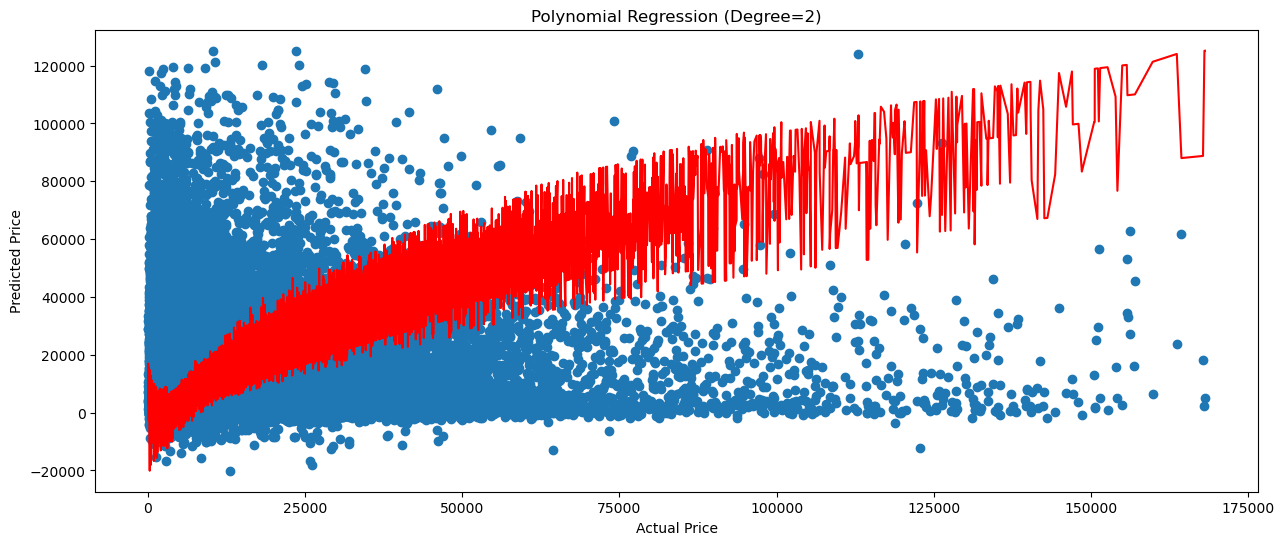

The evaluation metrics using the R² score is 0.90


In [46]:
predictPricePolyMult(['Year of manufacture' , 'Mileage' , 'Engine size'] , 'Price' , degree = 2)

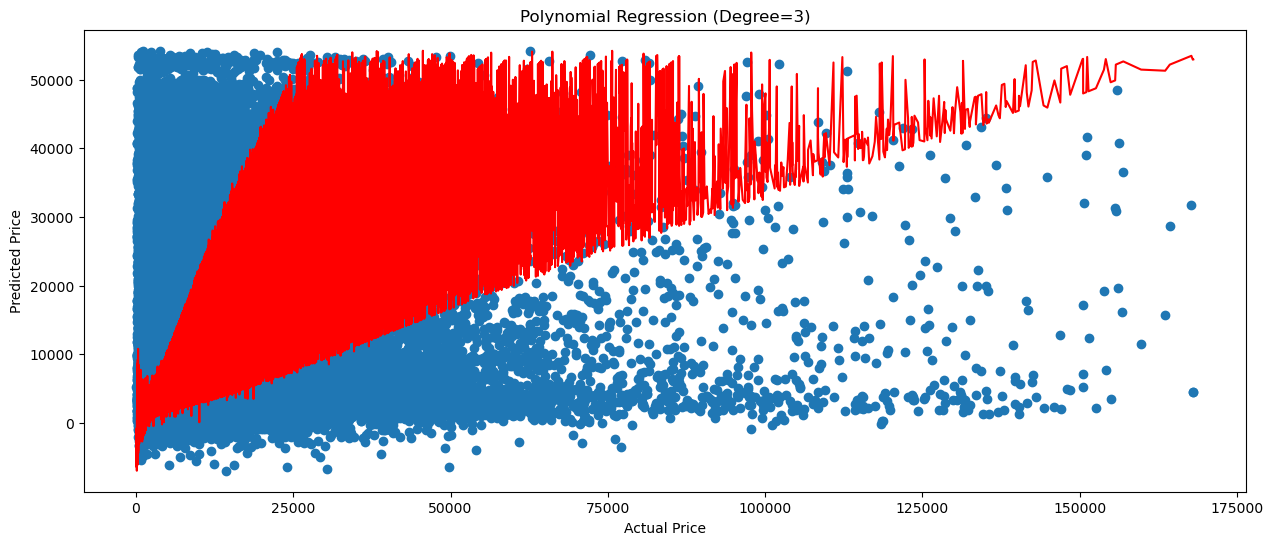

The evaluation metrics using the R² score is 0.63


In [47]:
predictPricePolyMult(['Year of manufacture' , 'Mileage'] , 'Price' , degree = 3)

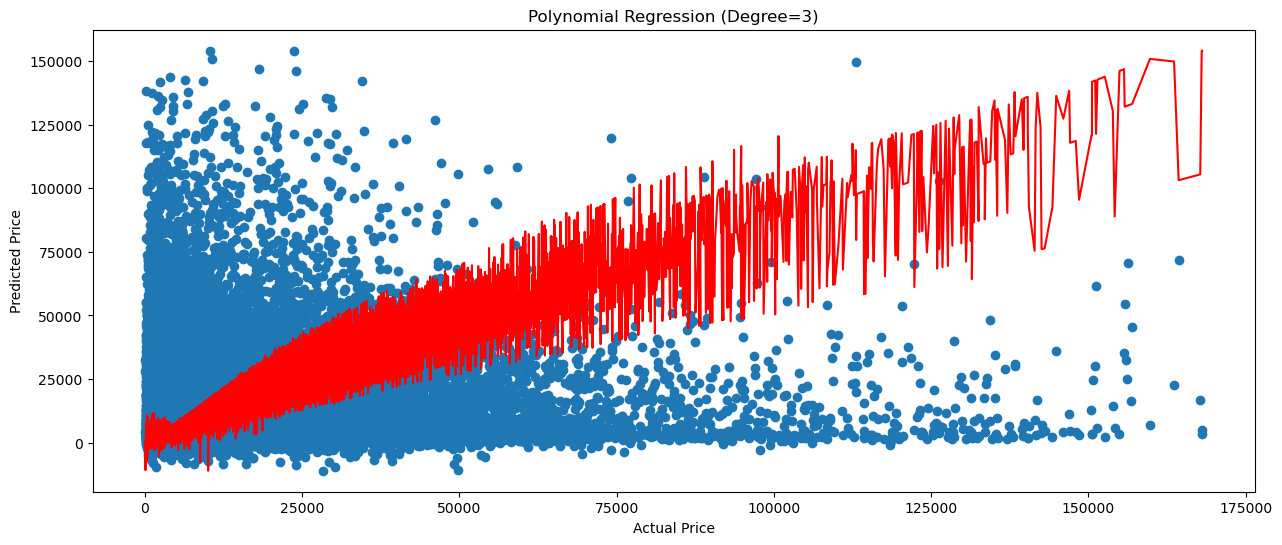

The evaluation metrics using the R² score is 0.92


In [48]:
predictPricePolyMult(['Year of manufacture' , 'Mileage' , 'Engine size'] , 'Price' , degree = 3)

# Based on this Analysis shows that Multiple Features increase the efficiency of the models

# Exercise 1C

In [49]:
def predictPriceWithCategorical(data_x, data_y, test_size=0.2, random_state=None,  n_estimators=100):
    #declare the car sales data global
    global car_data

    # Selecting numerous features and copying them in a data variable
    features = data_x + [data_y]
    data = car_data[features].copy()

    #specify the predictors that might be multiple or single
    X = data[data_x]
    y = data[data_y]

    # If using more than feature, reshape X to be a 2D array
    if isinstance(data_x, list):
        X = X[data_x]

    # get the categorical columns which are not int or float
    categorical_features = list(X.select_dtypes(include=['object']).columns)

    # Apply label encoding to categorical columns
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
        label_encoders[feature] = le
        
    #splitting the data using the train-test-split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and Fit the RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(x_train, y_train)

    # Predict the outcome
    y_pred = rf_model.predict(x_test)

    # Create a DataFrame with Actual and predicted values
    plot_data = pd.DataFrame({data_y: y_test, 'Predicted': y_pred})
    plot_data = plot_data.sort_values(by=data_y)  # Sort for better visualization

    

    # Scatter plot of actual against the predicted
    plt.figure(figsize=(15, 6))
    plt.scatter(plot_data[data_y], plot_data['Predicted'], label='Actual vs Predicted')
    plt.xlabel(f'{data_y}')
    plt.ylabel(f'Predicted {data_y}')
    plt.title(f'Random Forest Regression (Estimators={n_estimators})')
    plt.legend()
    plt.show()

    #print the evaluation
    print(f"The evaluation metrics using the R² score is {r2_score(y_test, y_pred):.2f}")


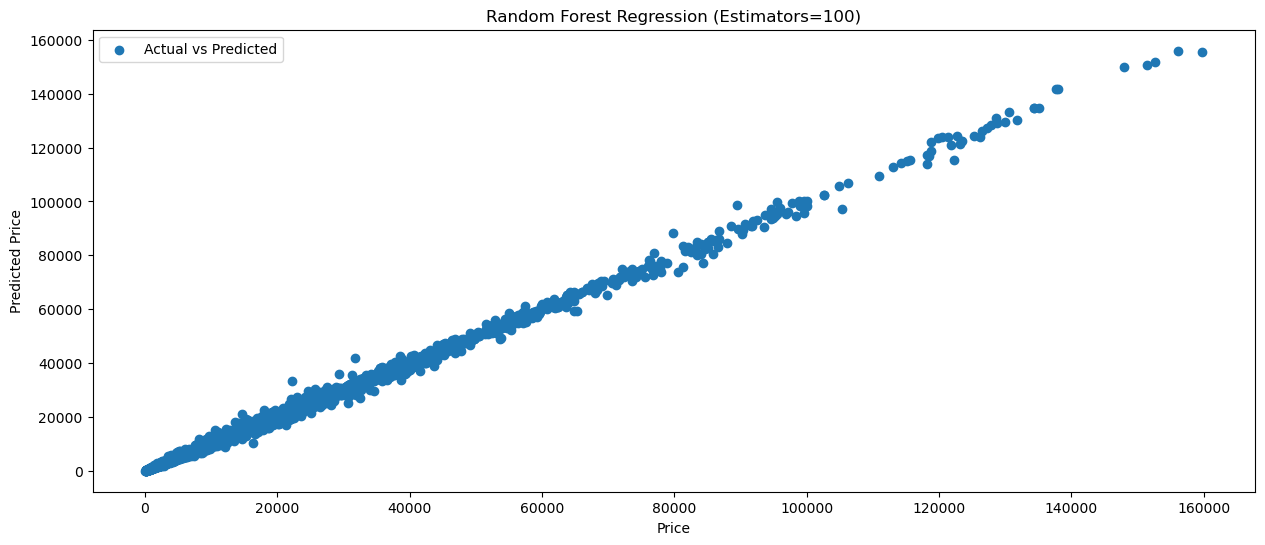

The evaluation metrics using the R² score is 1.00


In [50]:
#running the function with categorical variables
predictPriceWithCategorical(['Year of manufacture' , 'Mileage' , 'Engine size' , 'Manufacturer' , 'Model', 'Fuel type'] , 'Price' )

# Exercise 1D

## Using an Artificial Neural Network (ANN)  to predict the price of a car 

### Creating an artificial neural network model they are 4 stages in it.

#### Constructor stage

#### Compilation stage

#### Training stage

#### Evaluation stage

In [51]:
def getPredictedPrice(data_x, data_y, test_size=0.2, random_state=None):

    # Selecting numerous features and copying them in a data variable
    features = data_x + [data_y]
    data = car_data[features].copy()

    #specify the predictors that might be multiple or single
    X = data[data_x]
    y = data[data_y]

    # If using more than feature, reshape X to be a 2D array
    if isinstance(data_x, list):
        X = X[data_x]

    # get the categorical columns which are not int or float
    categorical_features = list(X.select_dtypes(include=['object']).columns)

    # Apply label encoding to categorical columns
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
        label_encoders[feature] = le
        
    #intializing the scaler function    
    scale = MinMaxScaler()
    scale.fit(X)
    
   #splitting the data using the train-test-split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    #Constructor stage
    
     #scaling transformation for the x_train and x_test
    x_train_scaled = scale.transform(x_train)
    
     #scaling transformation for the x_train and x_test
    x_test_scaled = scale.transform(x_test)
    
    #Building my neural network by intializing the model
    model = Sequential()
    model.add(Dense(units=64, input_dim=X.shape[1], activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units=64, activation="relu"))
    model.add(Dense(units=1, activation="linear"))
    model.summary()
    
    #Compilation and Training stage 1
    model.compile(optimizer="adam", loss='mean_squared_error', metrics='mean_squared_error')
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 20)
    history = model.fit(x = x_train_scaled , y = y_train , batch_size = None, epochs = 200,
                        verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])
    y_pred = model.predict(x_test_scaled)
    
    #plotting
    history_df = pd.DataFrame(history.history)
    plt.plot(history_df["loss"], label = "Training") 
    plt.plot(history_df["val_loss"], label = "Validation")
    plt.legend()
    plt.show()
    
    #Evaluation method
    r2 = r2_score(y_test, y_pred)
    print(f"The evaluation metric using the R² score is {r2:.2f}")

    return y_pred
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1125/1125 [==============================] - 4s 1ms/step - loss: 337525216.0000 - mean_squared_error: 337525216.0000 - val_loss: 241762864.000

1125/1125 [==============================] - 1s 1ms/step - loss: 20764034.0000 - mean_squared_error: 20764034.0000 - val_loss: 16765281.0000 - val_mean_squared_error: 16765281.0000
Epoch 81/200
1125/1125 [==============================] - 1s 1ms/step - loss: 20338108.0000 - mean_squared_error: 20338108.0000 - val_loss: 16817274.0000 - val_mean_squared_error: 16817274.0000
Epoch 82/200
1125/1125 [==============================] - 1s 1ms/step - loss: 19999152.0000 - mean_squared_error: 19999152.0000 - val_loss: 16830406.0000 - val_mean_squared_error: 16830406.0000
Epoch 83/200
1125/1125 [==============================] - 1s 1ms/step - loss: 20128204.0000 - mean_squared_error: 20128204.0000 - val_loss: 16753839.0000 - val_mean_squared_error: 16753839.0000
Epoch 84/200
1125/1125 [==============================] - 1s 1ms/step - loss: 20598980.0000 - mean_squared_error: 20598980.0000 - val_loss: 16728527.0000 - val_mean_squared_error: 16728527.0000
Epoch 85/200
1125/1125 [===================

1125/1125 [==============================] - 2s 1ms/step - loss: 19816946.0000 - mean_squared_error: 19816946.0000 - val_loss: 15889080.0000 - val_mean_squared_error: 15889080.0000
Epoch 165/200
1125/1125 [==============================] - 1s 1ms/step - loss: 19812936.0000 - mean_squared_error: 19812936.0000 - val_loss: 16020681.0000 - val_mean_squared_error: 16020681.0000
Epoch 166/200
1125/1125 [==============================] - 1s 1ms/step - loss: 19299988.0000 - mean_squared_error: 19299988.0000 - val_loss: 15907082.0000 - val_mean_squared_error: 15907082.0000
Epoch 167/200
1125/1125 [==============================] - 1s 1ms/step - loss: 19230178.0000 - mean_squared_error: 19230178.0000 - val_loss: 15959703.0000 - val_mean_squared_error: 15959703.0000
Epoch 168/200
1125/1125 [==============================] - 1s 1ms/step - loss: 19325740.0000 - mean_squared_error: 19325740.0000 - val_loss: 15868910.0000 - val_mean_squared_error: 15868910.0000
Epoch 169/200
1125/1125 [==============

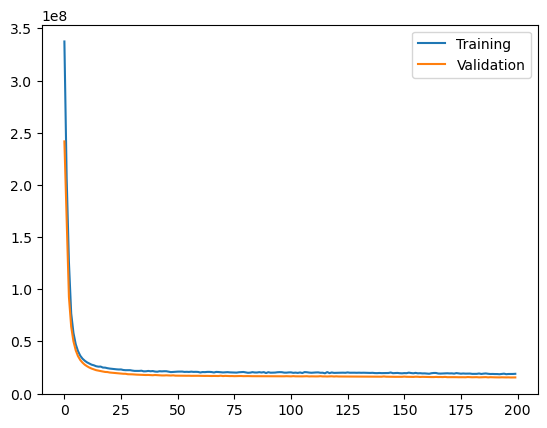

The evaluation metric using the R² score is 0.93


array([[ 1286.3588],
       [15237.273 ],
       [13018.641 ],
       ...,
       [11291.666 ],
       [25719.527 ],
       [ 3574.881 ]], dtype=float32)

In [52]:
#running the deep learning model to predict the price using my ANN architecture
getPredictedPrice(['Year of manufacture' , 'Mileage' , 'Engine size' , 'Manufacturer' , 'Model', 'Fuel type'] , 'Price' )

#### Based on the Result of the evaluation metrics , it is 96% accurate. Compared to the regression models with lower Accuracy. The use of Dropout deactivates come neurons for swift forward and backward propagation. 

#### Building my ANN model , I used an architectural model with 3 dense layers with two  64 neurons and 1 neuron then with the use of 2 relu activation functions and the last one linear. After that applying a dropout of 0.2 to the model.

#### While compiling i added an adam optimizer for better optimization of my model. the increase in my neurons , batch size , earlystopping , activation function, loss function. All these helped me for my hyperparameter tuning


## Exercise 1E

### Based on my model evaluation , the use of the Ensemble model really gave my model a good accuracy of 100%. The linearity was undiluted . Check Exercise 1C for the figure and the R2 score for better explaination.

## Exercise 1F

### use K-Means clustering to predict the price of the car

In [57]:
def segmentWithClust(data_x):
    global car_data
    
    # Specify the predictors that might be multiple or single
    X = car_data[data_x]

    # If using more than one feature, reshape X to be a 2D array
    if isinstance(data_x, list):
        X = X[data_x]

    # Get the categorical columns which are not int or float
    categorical_features = list(X.select_dtypes(include=['object']).columns)

    # Apply label encoding to categorical columns
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
        label_encoders[feature] = le

    # Initializing the scaler function
    scale = MinMaxScaler()
    x_scaled = scale.fit_transform(X)

    # Elbow method
    K = []

    # Using a for loop
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, init='k-means++')
        kmeans.fit(x_scaled)
        K.append(kmeans.inertia_)

    # Plotting the elbow method
    plt.figure(figsize=(15, 6))
    plt.plot(range(1, 11), K, marker='o')
    plt.title('K vs. Inertia')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()
    
    # Determine optimal number of clusters based on elbow method
    optimal_k = 2  # Change this to the value you obtained from the elbow method

    # Perform KMeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10, init='k-means++')
    clusters = kmeans.fit_predict(x_scaled)
    
    # Scatter plot for visualizing clusters
    plt.figure(figsize=(15, 6))
    scatter = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', label='Clusters')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(handles=scatter.legend_elements()[0], title='Clusters')
    plt.show()
    
    # Silhouette Score for evaluation
    silhouette_avg = silhouette_score(x_scaled, clusters)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    
    # Calculate the Davies Bouldin index for model evaluation
    db_score = davies_bouldin_score(x_scaled, clusters)
    print(f"Davies Bouldin Score: {db_score:.4f}")


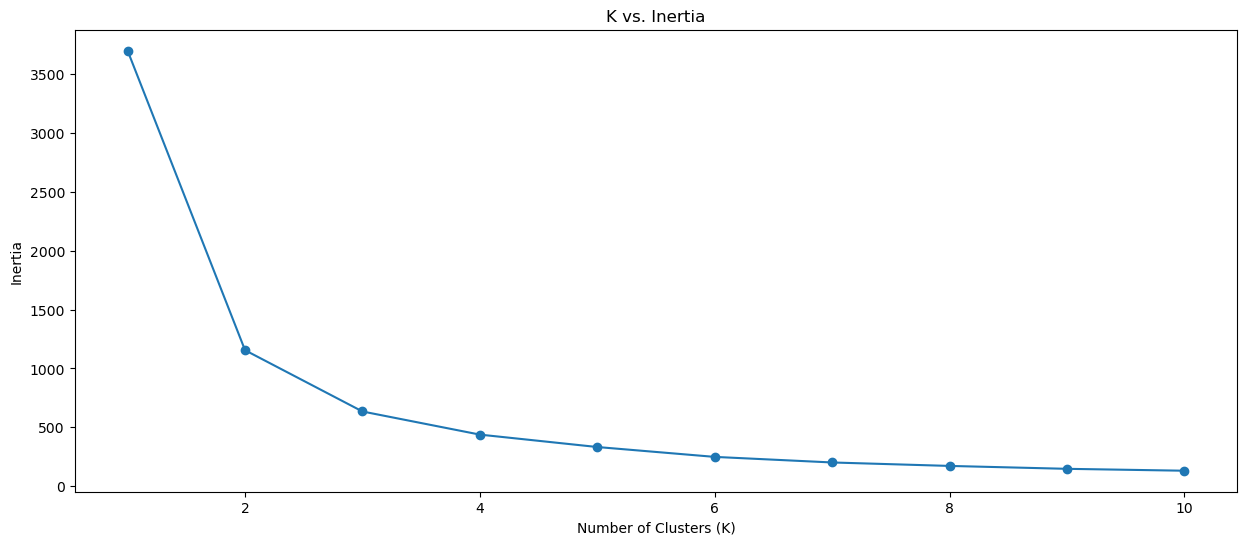

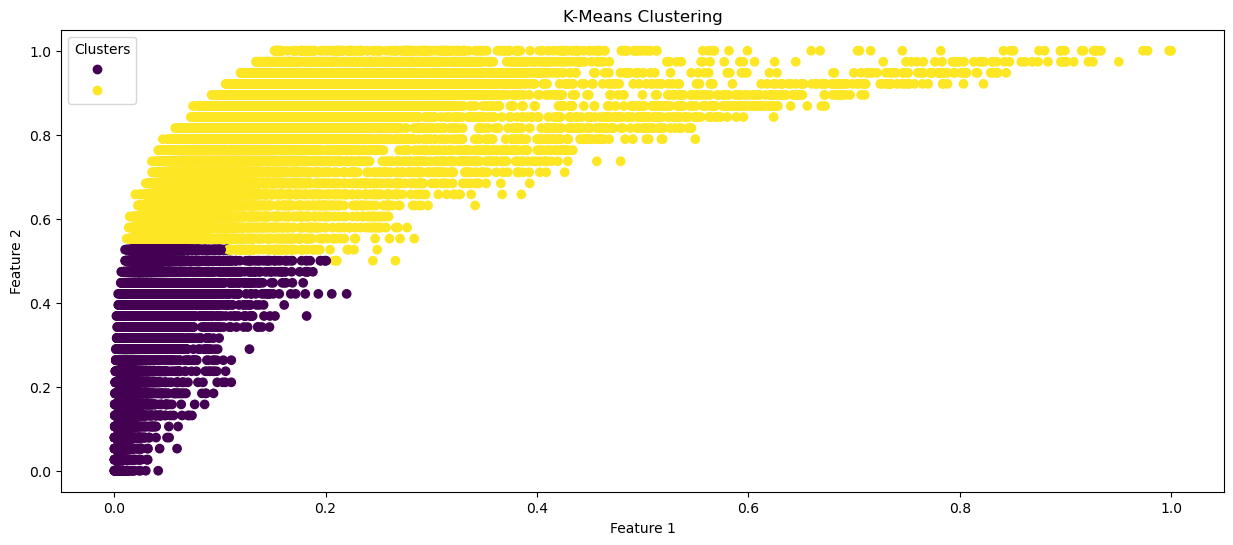

Silhouette Score: 0.5818
Davies Bouldin Score: 0.5708


In [58]:
# showing the segmentation data between various features
segmentWithClust(['Price','Year of manufacture'])

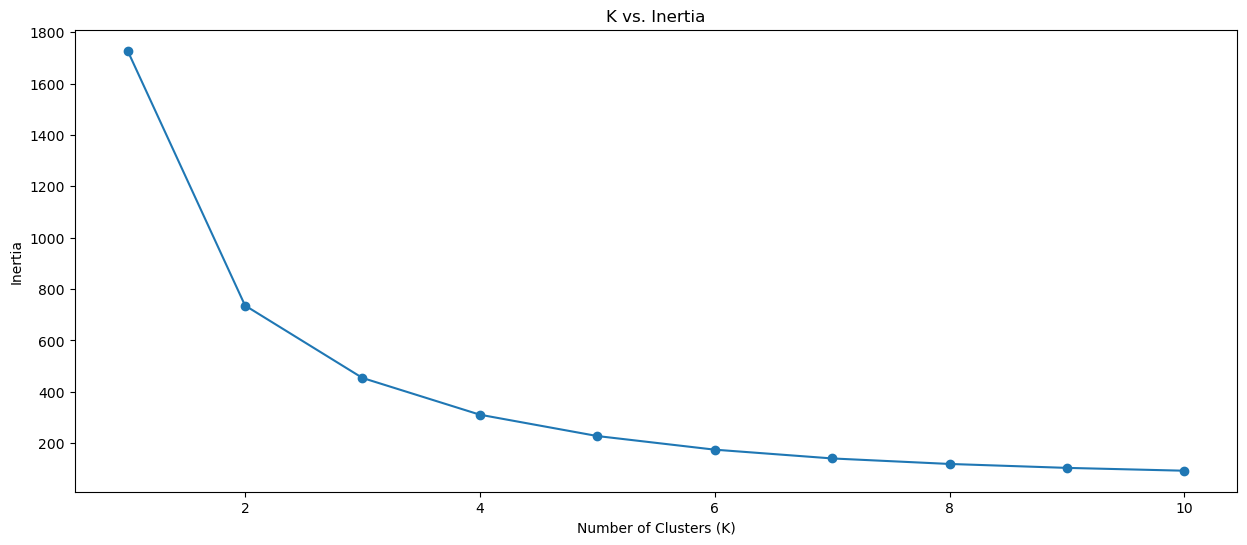

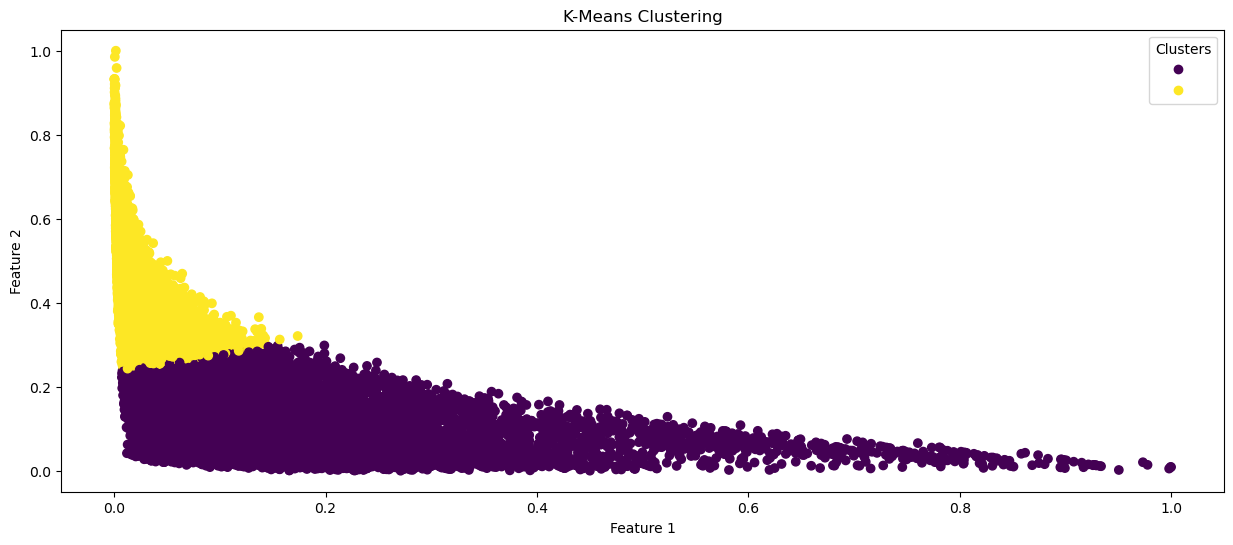

Silhouette Score: 0.5168
Davies Bouldin Score: 0.6809


In [59]:
segmentWithClust(['Price' , 'Mileage'])

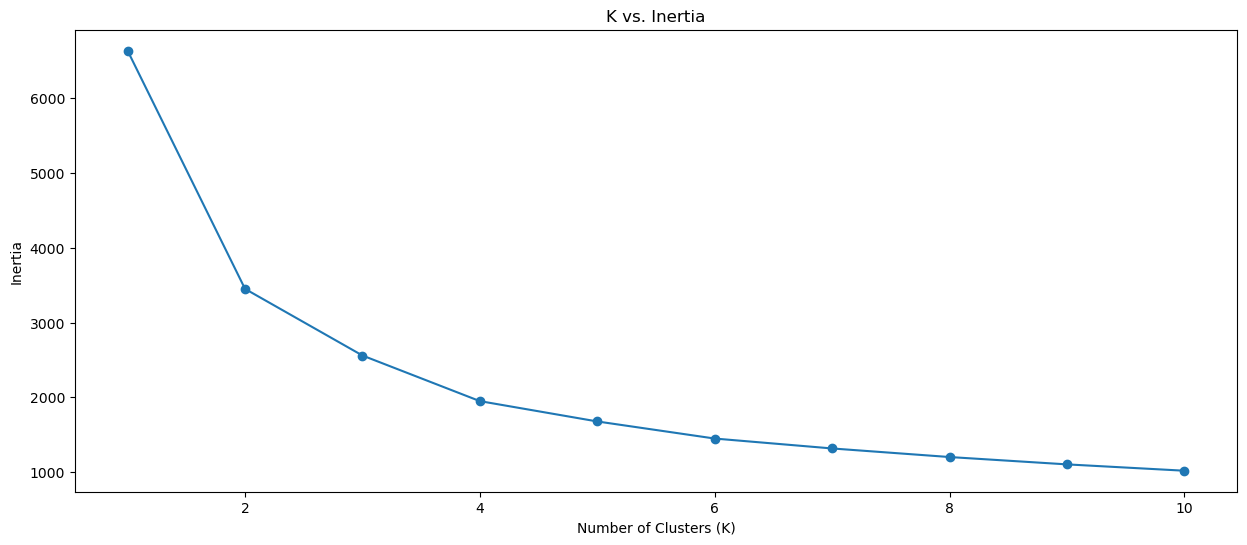

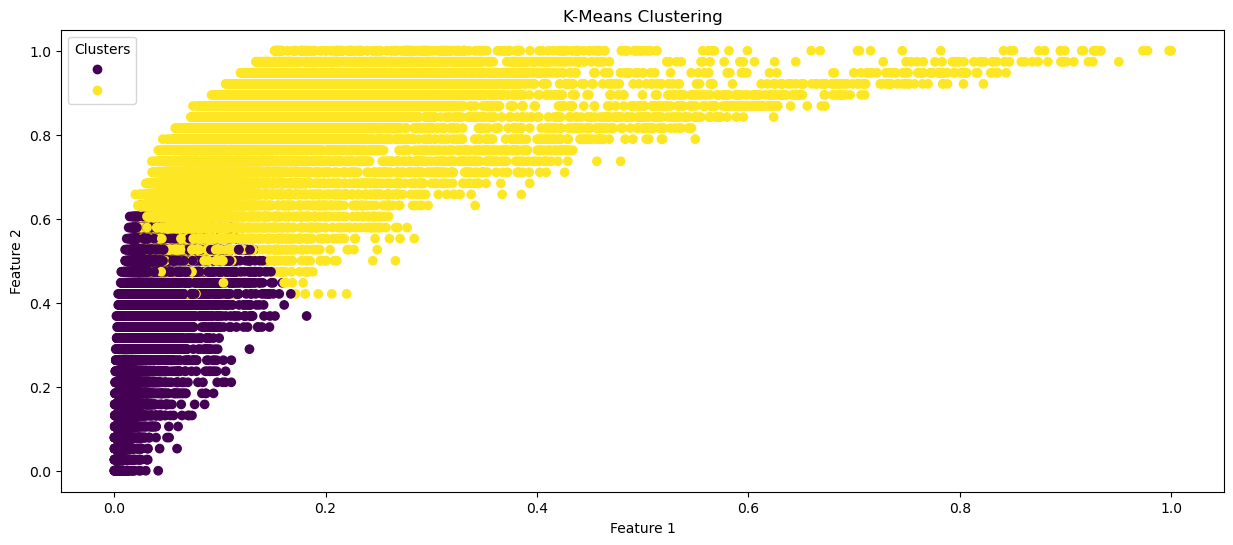

Silhouette Score: 0.4303
Davies Bouldin Score: 0.8935


In [60]:
#running the deep learning model to predict the price using my ANN architecture
segmentWithClust(['Price' , 'Year of manufacture' , 'Mileage' , 'Engine size'])

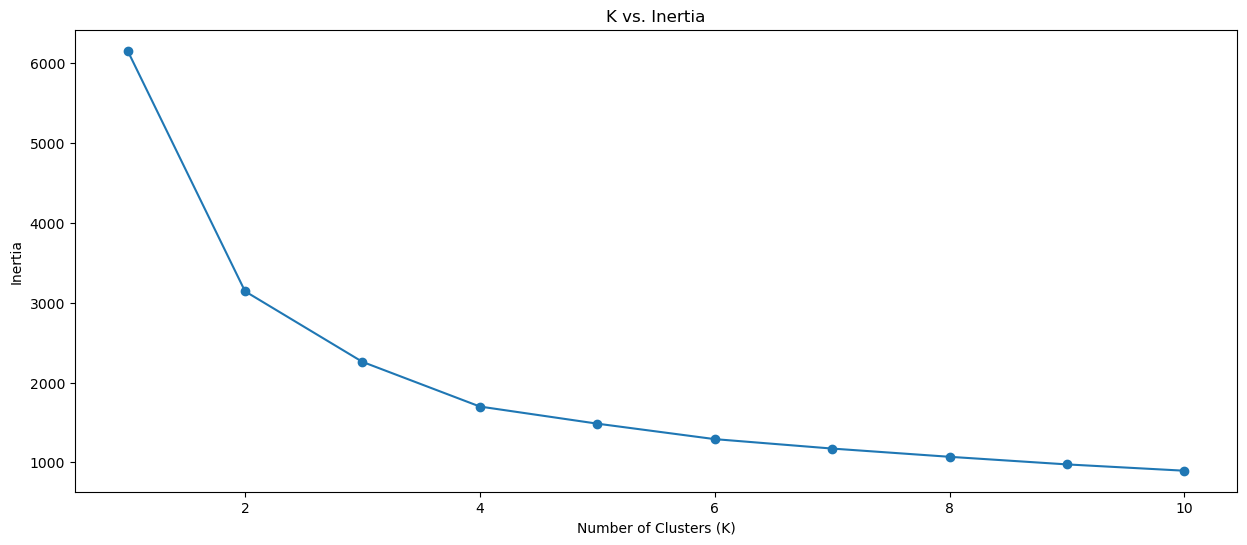

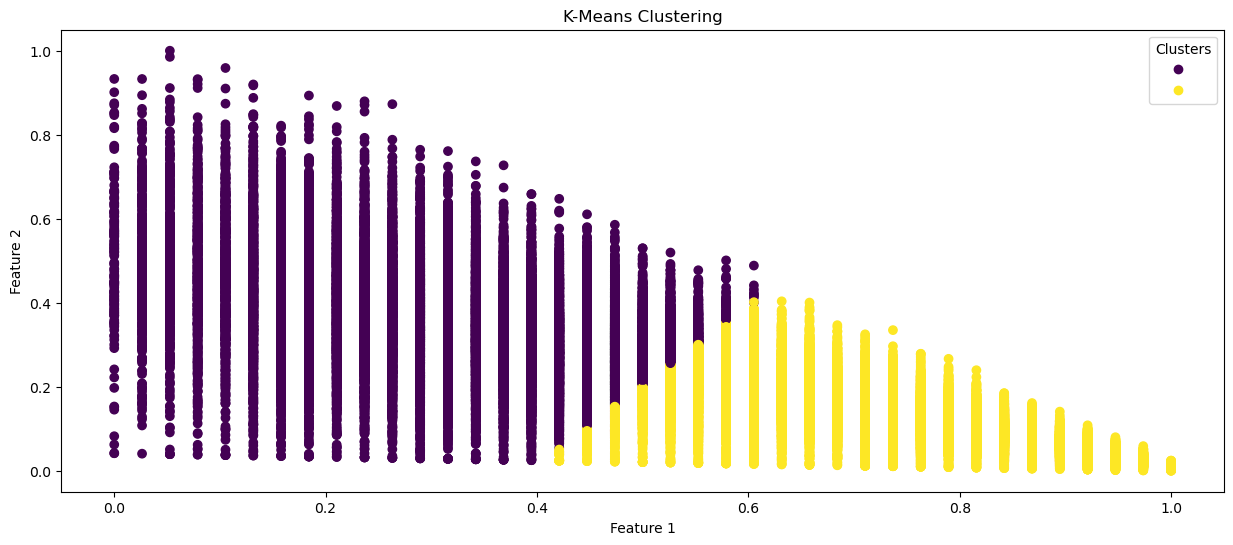

Silhouette Score: 0.4371
Davies Bouldin Score: 0.8812


In [61]:
segmentWithClust(['Year of manufacture' , 'Mileage' , 'Engine size'])

# Exercise 1FA

### What is the optimal number of clusters (k) to use and why

#### The optimal number of cluster is 2, This was because the edge of the elbow chart is pointing to the number of optimal 2. This shows why i should use 2 has the number of clusters.

### Which combination of variables produces the best clustering results? 

#### Based on the result of the models , it is shown that the clusters between the Price and the Year of manufacture has the fairest relationship compared to others. Judging by the Silhouette Score of 0.5818 and Davies Bouldin Score of 0.5708. This shows that object is well matched to its own cluster and poorly matched to neighboring clusters and also clusters are less distinct and more dispersed.

## Comparing this clustering method with another Clustering method 

In [66]:
def segmentWithDBSCAN(data_x, eps=0.5, min_samples=5, visualize=True):
    global car_data
    
    # Specify the predictors that might be multiple or single
    X = car_data[data_x]

    # If using more than one feature, reshape X to be a 2D array
    if isinstance(data_x, list):
        X = X[data_x]

    # Get the categorical columns which are not int or float
    categorical_features = list(X.select_dtypes(include=['object']).columns)

    # Apply label encoding to categorical columns
    label_encoders = {}
    for feature in categorical_features:
        le = LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
        label_encoders[feature] = le

    # Initializing the scaler function
    scale = MinMaxScaler()
    x_scaled = scale.fit_transform(X)

    # Use PCA for dimensionality reduction
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_scaled)

    # Use K-Means for initial centroids
    kmeans = KMeans(n_clusters=min_samples)
    kmeans.fit(x_pca)
    initial_centroids = kmeans.cluster_centers_

    # Using DBSCAN for density-based clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    clusters = dbscan.fit_predict(x_pca)

    # Visualize clusters (scatter plot for the first two features)
    if visualize:
        plt.figure(figsize=(15, 6))
        plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', label='Clusters')
        plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='X', label='Initial Centroids')
        plt.title('DBSCAN Clustering')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.show()

    # Silhouette Score for evaluation (Note: Silhouette Score might not be applicable for DBSCAN)
    try:
        silhouette_avg = silhouette_score(x_pca, clusters)
        print(f"Silhouette Score: {silhouette_avg:.4f}")
    except ValueError:
        print("Silhouette Score is not applicable for DBSCAN.")

    # Calculate the Davies Bouldin index for model evaluation
    db_score = davies_bouldin_score(x_pca, clusters)
    print(f"Davies Bouldin Score: {db_score:.4f}")


In [ ]:
segmentWithDBSCAN(['Price','Year of manufacture'])

In [ ]:
segmentWithDBSCAN(['Price' , 'Mileage'])

In [ ]:
segmentWithDBSCAN(['Price' , 'Year of manufacture' , 'Mileage' , 'Engine size'])

In [ ]:
segmentWithDBSCAN(['Year of manufacture' , 'Mileage' , 'Engine size'])